# Rain in Australia

👉 This study will examine the dataset named as **"Rain in Australia"** at Kaggle website [external link text](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
).

Context of this dataset predicting next-day rain by training classification models on the target variable RainTomorrow.

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

Features includes that one of the location at spesific time;

Temperature,rainfall,evaporation,sunshine,windspeed,humidity,pressure,cloud


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [70]:
df=pd.read_csv('weatherAUS.csv')

# Data Analysis

In [71]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [72]:
df.shape

(145460, 23)

In [73]:
df.isnull().sum()  #There are lots of none values.

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [74]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [75]:
#Clear the columns that has %60 none values.
for i in df.columns:
   if (df[i].isnull().sum()>df.shape[0]*0.6):
     df.drop([i],axis=1,inplace=True)

In [76]:
df.fillna(method="bfill",inplace=True) #I choose the back fill method to fill the none values.

In [77]:
df=df.dropna(how='any',axis=0) 

In [78]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142303 entries, 0 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142303 non-null  object 
 1   Location       142303 non-null  object 
 2   MinTemp        142303 non-null  float64
 3   MaxTemp        142303 non-null  float64
 4   Rainfall       142303 non-null  float64
 5   Evaporation    142303 non-null  float64
 6   Sunshine       142303 non-null  float64
 7   WindGustDir    142303 non-null  object 
 8   WindGustSpeed  142303 non-null  float64
 9   WindDir9am     142303 non-null  object 
 10  WindDir3pm     142303 non-null  object 
 11  WindSpeed9am   142303 non-null  float64
 12  WindSpeed3pm   142303 non-null  float64
 13  Humidity9am    142303 non-null  float64
 14  Humidity3pm    142303 non-null  float64
 15  Pressure9am    142303 non-null  float64
 16  Pressure3pm    142303 non-null  float64
 17  Cloud9am       142303 non-nul

In [80]:
df["RainTomorrow"].value_counts()

No     108954
Yes     33349
Name: RainTomorrow, dtype: int64

In [81]:
df['RainTomorrow'] = df['RainTomorrow'].replace("No" , 0).replace("Yes", 1)
df['RainToday'] = df['RainToday'].replace("No" , 0).replace("Yes", 1)

In [82]:
df["Date"]=pd.to_datetime(df["Date"])

In [83]:
df["year"] = df.Date.dt.year
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.days_in_month

In [84]:
df.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
109099,2010-05-13,Albany,12.5,15.8,1.4,3.2,0.0,SSE,39.0,S,...,1011.6,8.0,8.0,14.8,15.0,1,1,2010,5,31


In [85]:
df.drop("Date",axis=1,inplace=True)

In [86]:
df.Location.value_counts()

Canberra            3436
Sydney              3344
Adelaide            3193
Melbourne           3193
Hobart              3193
Perth               3193
Brisbane            3193
Darwin              3192
Ballarat            3040
Townsville          3040
MountGambier        3040
GoldCoast           3040
Cairns              3040
Albany              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
BadgerysCreek       3009
NorfolkIsland       3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
Nuriootpa           3009
Woomera             3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009
Dartmoor            3009


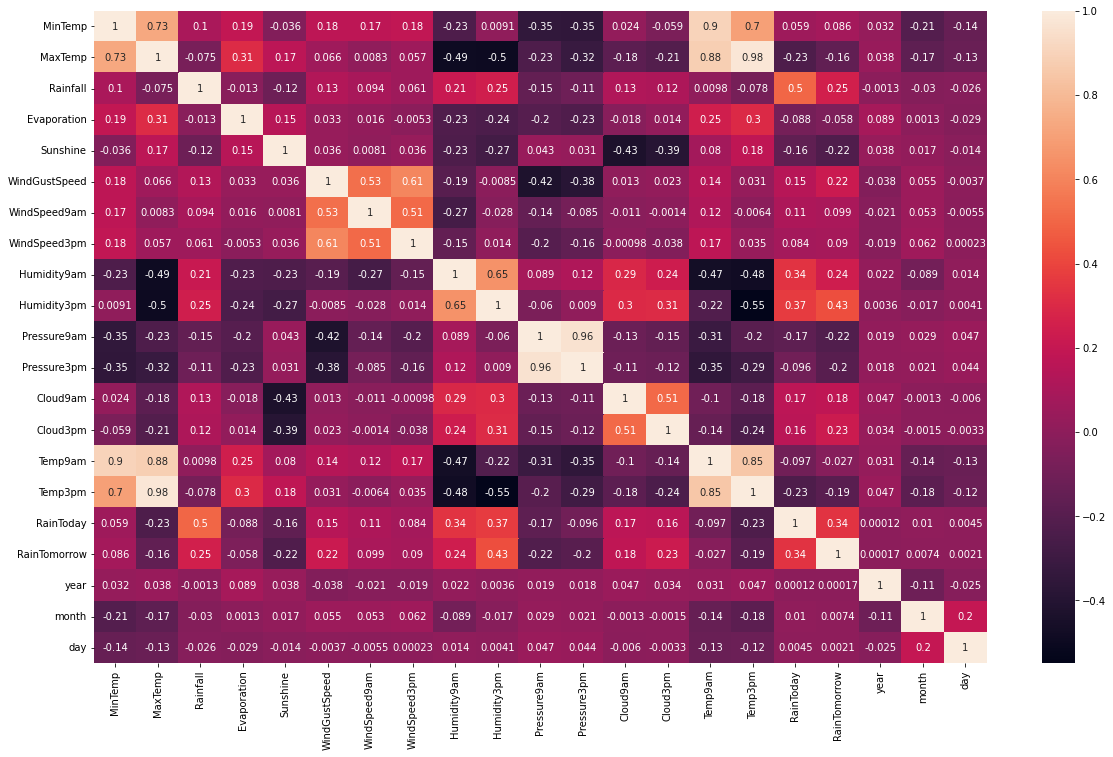

In [87]:
cor = df.corr()
plt.figure(figsize = (20,12))
sns.heatmap(cor, annot=True);

In [88]:
abs(df.corr()['RainTomorrow']).sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.429674
RainToday        0.340321
Rainfall         0.253066
Humidity9am      0.243247
Cloud3pm         0.231196
Sunshine         0.222299
Pressure9am      0.221431
WindGustSpeed    0.219940
Pressure3pm      0.197342
Temp3pm          0.190255
Cloud9am         0.182437
MaxTemp          0.159496
WindSpeed9am     0.099299
WindSpeed3pm     0.090283
MinTemp          0.085821
Evaporation      0.057506
Temp9am          0.026969
month            0.007377
day              0.002098
year             0.000174
Name: RainTomorrow, dtype: float64

In [89]:
df.drop(["month","day","year"],axis=1,inplace=True)  #Because of low correlation I dropped these columns.

# Split data

In [90]:
x=df.drop("RainTomorrow",axis=1)
y=df["RainTomorrow"]

In [91]:
x = pd.get_dummies(x,drop_first=True)

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [93]:
x.shape

(142303, 108)

# Classification Models

In [94]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 
    from sklearn.metrics import plot_precision_recall_curve 
    


    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()

    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [95]:
#classification_funct(x,y)  # Because it worked a long time.

In [96]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [97]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [98]:
tahmin=d.predict(x_test)

In [99]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 
accuracy_score(tahmin,y_test)

0.7805157995830503

In [ ]:
# I choose the Decision Tree Classifier model, and predicts are %78 accurate.

# Neural Network

Classification with Deep Learning algorithm.

In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

In [103]:
model=Sequential()
model.add(Dense(8, activation="relu"))   
model.add(Dense(12, activation="relu"))   
model.add(Dense(10, activation="relu"))   
model.add(Dense(8, activation="relu"))   
model.add(Dense(6, activation="relu"))   
model.add(Dense(1, activation="sigmoid"))

In [104]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [105]:
model.fit(x = x_train, y = y_train, 
          batch_size = 128, epochs = 30,verbose = 1,callbacks = [])

Epoch 1/30
779/779 [==============================] - 3s 3ms/step - loss: 0.4332 - accuracy: 0.8151
Epoch 2/30
779/779 [==============================] - 2s 3ms/step - loss: 0.3953 - accuracy: 0.8273
Epoch 3/30
779/779 [==============================] - 2s 3ms/step - loss: 0.3896 - accuracy: 0.8309
Epoch 4/30
779/779 [==============================] - 3s 3ms/step - loss: 0.3877 - accuracy: 0.8315
Epoch 5/30
779/779 [==============================] - 2s 3ms/step - loss: 0.3836 - accuracy: 0.8328
Epoch 6/30
779/779 [==============================] - 2s 3ms/step - loss: 0.3835 - accuracy: 0.8335
Epoch 7/30
779/779 [==============================] - 2s 3ms/step - loss: 0.3820 - accuracy: 0.8338
Epoch 8/30
779/779 [==============================] - 2s 3ms/step - loss: 0.3798 - accuracy: 0.8353
Epoch 9/30
779/779 [==============================] - 3s 3ms/step - loss: 0.3797 - accuracy: 0.8346
Epoch 10/30
779/779 [==============================] - 2s 3ms/step - loss: 0.3781 - accuracy: 0.8352

In [106]:
y_pred = model.predict(x_test)

1335/1335 [==============================] - 2s 1ms/step


In [107]:
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,recall_score
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     32654
           1       0.68      0.59      0.63     10037

    accuracy                           0.84     42691
   macro avg       0.78      0.75      0.76     42691
weighted avg       0.83      0.84      0.83     42691



In [ ]:
# With the less none valued data, the model will results higher accuracy score.